In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../scripts/")

import numpy as np
import processData

In [3]:
#dedupe_dict = processData.createDedupe(DEDUPE_PATHS = ["2016_2017_df.csv"], ID_INDEX=0, DEDUPE_INDEX=9)

In [4]:
dedupe_dict = processData.getDedupe(PATH = "../pickles/2016_2017_dedupe.pickle")

In [5]:
y_2016 = np.load("../model/2016_y.npy")
y_2017 = np.load("../model/2017_y.npy")

In [6]:
SAMPLE = 1
NEG_SCALE = 2
SIZE_POS = np.sum(y_2016) + np.sum(y_2017)
SIZE_NEG = y_2016.shape[0] + y_2017.shape[0] - SIZE_POS

NUM_POS = int(SIZE_POS*SAMPLE)
NUM_NEG = int(NUM_POS*NEG_SCALE)

PROB_POS = SAMPLE
PROB_NEG = NUM_NEG/float(SIZE_NEG)

print(SIZE_POS)
print(SIZE_NEG)
print(NUM_POS)
print(NUM_NEG)
print(PROB_POS)
print(PROB_NEG)

(x_train, y_train), (x_valid, y_valid), (x_test, y_test) = processData.readDataDedupe(PATHS = ["../csvs/2016_partial_ht_content.csv",
                                                                                               "../csvs/2017_partial_ht_content.csv"],
                                                                                      ID_INDEX = 0, TEXT_INDEX = 1,
                                                                                      Y_INDEX = 2, TRAIN_SPLIT = 0.9,
                                                                                      NUM_POS = NUM_POS,
                                                                                      NUM_NEG = NUM_NEG,
                                                                                      MAX_FIELD = 2000,
                                                                                      PROB_POS = PROB_POS,
                                                                                      PROB_NEG = PROB_NEG,
                                                                                      dedupe_dict = dedupe_dict)

689648
33108355
689648
1379296
1
0.041660058314585545
Unique positives: 7170
Unique negatives: 1277380
Total processed: 33798003
Pos size: 636381
Neg size: 1257868
Train size: 1708371
Valid size: 97854
Test size: 88024


In [7]:
#MAX_EXAMPLES = np.sum(np.load("2017_y.npy"))

#x_valid = np.concatenate((x_valid, x_test), axis=0)
#y_valid = np.concatenate((y_valid, y_test))

#(x_test, y_test) = processData.readData(PATHS = ["2017_partial_ht_content.csv"], ID_INDEX = 0, TEXT_INDEX = 1, Y_INDEX = 2,
#                                        MAX_EXAMPLES = MAX_EXAMPLES, MAX_FIELD = 2000)

In [8]:
model = processData.createModel(x_train, x_valid, x_test)

In [9]:
model, history, score, acc = processData.runModel(model, x_train, y_train, x_valid, y_valid, x_test, y_test,
                                                  save_name="../model/2016_2017_model.h5")

Train on 1708371 samples, validate on 97854 samples
Epoch 1/3
1708371/1708371 [==============================] - 1125s 658us/step - loss: 0.5398 - acc: 0.7760 - val_loss: 0.5940 - val_acc: 0.7111
Epoch 2/3
1708371/1708371 [==============================] - 1118s 654us/step - loss: 0.5032 - acc: 0.7848 - val_loss: 0.6316 - val_acc: 0.6710
Epoch 3/3
88024/88024 [==============================] - 13s 152us/step


In [10]:
print('History: ', history.history)
print('Test lost:', score)
print('Test accuracy:', acc)

History:  {'val_loss': [0.5939732276366612, 0.6315955298968348, 0.5548557703329151], 'val_acc': [0.711141087738091, 0.6710098718547718, 0.7316921127430419], 'loss': [0.5397662187047493, 0.5031755372177142, 0.4997169026893299], 'acc': [0.7759690371708116, 0.7848488413817135, 0.7854453160347039]}
Test lost: 0.5228568724824073
Test accuracy: 0.7427633372662361


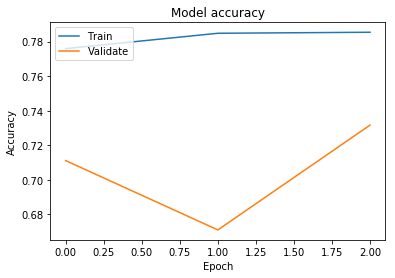

In [27]:
processData.getPlot(history, save_name = "../model/2016_2017_model_accuracy.png")

In [12]:
y_pred = model.predict(x_test)

In [13]:
cm, precision, recall, f1 = processData.getConfusion(y_test, y_pred, val = 0.5)

In [14]:
print("Confusion matrix:")
print(cm)
print()
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))

Confusion matrix:
[[61526  1340]
 [21303  3855]]

Precision: 0.7420596727622714
Recall: 0.15323157643691868
F1: 0.127005567818667


In [15]:
y_pred = model.predict(x_train)

In [16]:
cm, precision, recall, f1 = processData.getConfusion(y_train, y_pred, val = 0.5)

In [17]:
print("Confusion matrix:")
print(cm)
print()
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))

Confusion matrix:
[[1107423   24812]
 [ 424207  151929]]

Precision: 0.8596137851432322
Recall: 0.2637033617062638
F1: 0.20179790324315922


In [18]:
x_all = np.concatenate((x_train, x_valid), axis=0)
x_all = np.concatenate((x_all, x_test), axis=0)

In [19]:
y_pred = model.predict(x_all)

In [20]:
y_all = np.concatenate((y_train, y_valid))
y_all = np.concatenate((y_all, y_test))

In [21]:
cm, precision, recall, f1 = processData.getConfusion(y_all, y_pred, val = 0.5)

In [22]:
print("Confusion matrix:")
print(cm)
print()
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))

Confusion matrix:
[[1230313   27555]
 [ 470362  166019]]

Precision: 0.8576513374730077
Recall: 0.2608798817060849
F1: 0.20003373676886096


In [26]:
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)
y_test_pred = model.predict(x_test)

In [29]:
y_train_path = "../model/2016_2017_model_y_train.npy"
y_train_pred_path = "../model/2016_2017_model_y_train_pred.npy"

y_valid_path = "../model/2016_2017_model_y_valid.npy"
y_valid_pred_path = "../model/2016_2017_model_y_valid_pred.npy"

y_test_path = "../model/2016_2017_model_y_test.npy"
y_test_pred_path = "../model/2016_2017_model_y_test_pred.npy"

np.save(y_train_path, y_train)
np.save(y_train_pred_path, y_train_pred)

np.save(y_valid_path, y_valid)
np.save(y_valid_pred_path, y_valid_pred)

np.save(y_test_path, y_test)
np.save(y_test_pred_path, y_test_pred)
